In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# make dataframe from csv
bank_df = pd.read_csv("bank-full_2.csv")
bank_df.head()

,Unnamed: 0,index,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact,duration_sec,campaign,pdays,previous,poutcome,subscription,date,weekday
0,0,0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05,Monday
1,1,1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05,Monday
2,2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05,Monday
3,3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05,Monday
4,4,4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05,Monday


In [3]:
bank_df.isnull().values.any()

False

In [4]:
print(f"Duplicate entries: {bank_df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
bank_df['age'].nunique()

77

In [6]:
bank_df.drop(['index', 'pdays','previous','poutcome'],axis=1, inplace=True)

In [7]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object']).columns)
bank_list

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact',
 'subscription',
 'date',
 'weekday']

In [8]:
thing =bank_df[bank_list].nunique()
thing

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
subscription        2
date              561
weekday             7
dtype: int64

In [9]:
bank_list_binary = ['credit_default','housing_loan','personal_loan','subscription']


In [10]:
# changing data type of binary choices from object to bool
for x in bank_list_binary:
    bank_df[x]=bank_df[x]=="yes"
bank_df[bank_list].nunique()

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
subscription        2
date              561
weekday             7
dtype: int64

In [11]:
# dropping uneeded columns
# bank_df.drop('index',axis=1, inplace=True)

In [12]:
# change date to datetime format
bank_df['date']=pd.to_datetime(bank_df['date'])

# create data
dates = bank_df['date']

# calculate unix datetime
bank_df['date']=(dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


bank_df.dtypes


Unnamed: 0         int64
age                int64
job               object
marital           object
education         object
credit_default      bool
balance            int64
housing_loan        bool
personal_loan       bool
contact           object
duration_sec       int64
campaign           int64
subscription        bool
date               int64
weekday           object
dtype: object

propbaly should run factoranalysis.
or dimensionality reductions via principal componet analysis.

In [13]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object','category']).columns)
bank_list

['job', 'marital', 'education', 'contact', 'weekday']

In [14]:
bank_df[bank_list].nunique()

job          12
marital       3
education     4
contact       3
weekday       7
dtype: int64

In [15]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(bank_df[bank_list]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(bank_list)
encode_df.head()

c:\Users\rab_b\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_cellular,contact_telephone,contact_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge the two DataFrames together and drop the Country column
bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


C:\Users\rab_b\AppData\Local\Temp\ipykernel_4876\2310923932.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


In [17]:
bank_df.drop('Unnamed: 0',axis=1, inplace=True)
bank_df

,age,credit_default,balance,housing_loan,personal_loan,duration_sec,campaign,subscription,date,job_admin.,...,contact_cellular,contact_telephone,contact_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,58,False,2143,True,False,261,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,44,False,29,True,False,151,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,33,False,2,True,True,76,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,47,False,1506,True,False,92,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,33,False,1,False,False,198,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,False,825,False,False,977,3,True,1289952000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,False,1729,False,False,456,2,True,1289952000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,False,5715,False,False,1127,5,True,1289952000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,57,False,668,False,False,508,4,False,1289952000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
bank_df.dtypes

age                      int64
credit_default            bool
balance                  int64
housing_loan              bool
personal_loan             bool
duration_sec             int64
campaign                 int64
subscription              bool
date                     int64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
contact_cellular       float64
contact_telephone      float64
contact_unknown        float64
weekday_Friday         float64
weekday_

In [19]:
bank_df.subscription

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: subscription, Length: 45211, dtype: bool

In [20]:
# set up data x and y
y = bank_df.subscription
X = bank_df.drop(columns="subscription")

In [21]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

In [30]:
# Define the logistic regression model
from sklearn.metrics import confusion_matrix, classification_report
log_classifier = LogisticRegression(solver="lbfgs",max_iter=50)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred_test = log_classifier.predict(X_test_scaled)
y_pred_train = log_classifier.predict(X_train_scaled)

conf_df= pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns =['Pred_Neg','Pred_Pos'] , index=['Actual_Neg', 'Actual_Pos'] )
print(classification_report(y_test, y_pred_test))

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 
conf_df

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      9998
        True       0.60      0.35      0.44      1305

    accuracy                           0.90     11303
   macro avg       0.76      0.66      0.69     11303
weighted avg       0.88      0.90      0.89     11303

Training set metrics:
Accuracy: 0.9011147811725846
Precision: 0.6386813186813187
Recall: 0.36470883534136544
Test set metrics:
Accuracy: 0.8978147394497036
Precision: 0.5966494845360825
Recall: 0.35478927203065136


,Pred_Neg,Pred_Pos
Actual_Neg,9685,313
Actual_Pos,842,463


In [32]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=25, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# evaluate training
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')

# Evaluate the model
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)

conf_df= pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns =['Pred_Neg','Pred_Pos'] , index=['Actual_Neg', 'Actual_Pos'] )
print(classification_report(y_test, y_pred_test))

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 
conf_df

Training Score: 0.9991152530376313
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      9998
        True       0.62      0.46      0.52      1305

    accuracy                           0.90     11303
   macro avg       0.77      0.71      0.74     11303
weighted avg       0.89      0.90      0.90     11303

Training set metrics:
Accuracy: 0.9991152530376313
Precision: 0.9994946942900454
Recall: 0.9929718875502008
Test set metrics:
Accuracy: 0.9043616738918872
Precision: 0.6161825726141079
Recall: 0.45517241379310347


,Pred_Neg,Pred_Pos
Actual_Neg,9628,370
Actual_Pos,711,594


In [29]:
# Create a random forest classifier.
knn_model = KNeighborsClassifier(n_neighbors=2, weights='uniform',leaf_size=15)

# Fitting the model
knn_model = knn_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_test = knn_model.predict(X_test_scaled)
y_pred_train = knn_model.predict(X_train_scaled)

conf_df= pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns =['Pred_Neg','Pred_Pos'] , index=['Actual_Neg', 'Actual_Pos'] )
print(classification_report(y_test, y_pred_test))

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 
conf_df

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      9998
        True       0.56      0.19      0.28      1305

    accuracy                           0.89     11303
   macro avg       0.73      0.59      0.61     11303
weighted avg       0.86      0.89      0.86     11303

Training set metrics:
Accuracy: 0.9271853249970509
Precision: 1.0
Recall: 0.3802710843373494
Test set metrics:
Accuracy: 0.8894983632663894
Precision: 0.5639269406392694
Recall: 0.189272030651341


,Pred_Neg,Pred_Pos
Actual_Neg,9807,191
Actual_Pos,1058,247


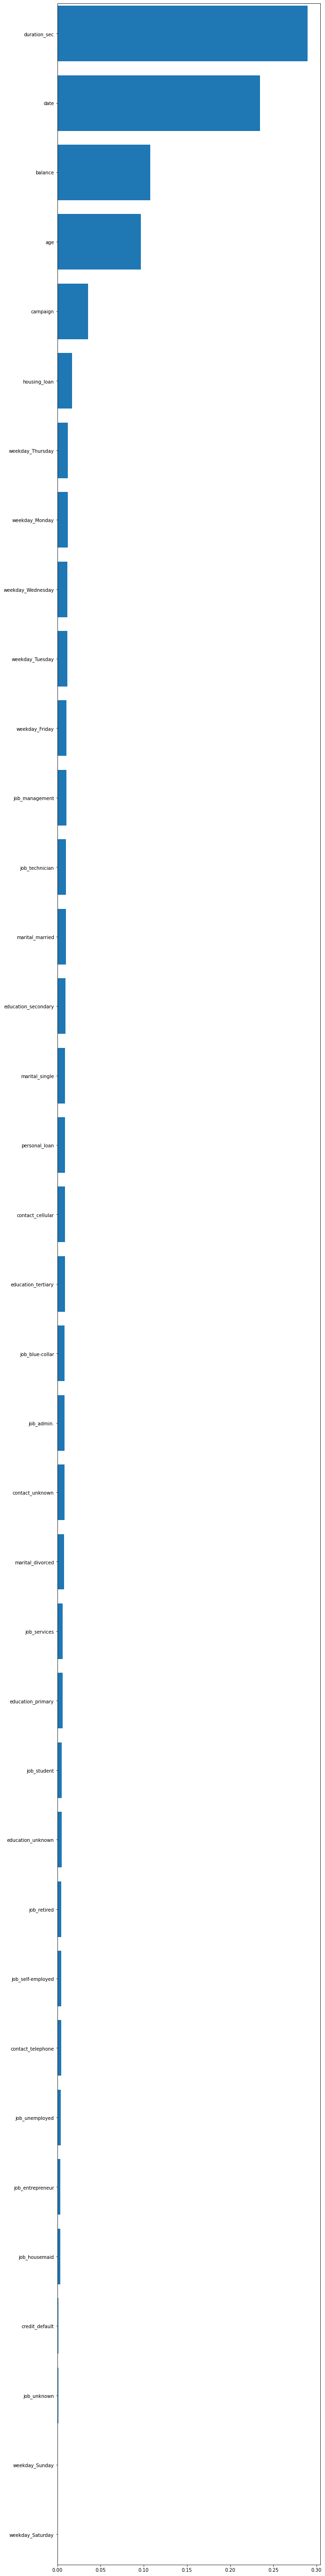

In [26]:
features = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,100)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()